In [11]:
using PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

In [81]:
# matplotlib.rcParams["text.usetex"] = true

In [82]:
img = convert(Array{Float64,2}, load("../input_img/Iine_100_100_gs.png"));

In [83]:
const σ_1 = 1
const σ_2 = 0.5
const γ = 10;
const K = 12;

In [84]:
u_p = Laminart.I_u(img)
u_m = - u_p
v_p = fun_equ.(u_p)
v_m = fun_equ.(u_m)
v = relu.(v_p)-relu.(v_m)
V = exp(-1/8) .* imfilter(v, Kernel.gaussian(σ_2), "circular")

R = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2]*K),size(V)[1],size(V)[2],K)
L = copy(R)

for k in 1:K
    θ = π*(k-1)/K
    R[:,:,k] = imfilter(V, relu.(LamKernels.kern_d(σ_2, θ)), "circular")
    L[:,:,k] = -imfilter(V, relu.(-LamKernels.kern_d(σ_2, θ)), "circular")
end

S_a = R .+ L
S_b = -abs.(R .- L)
S = γ .* relu.(S_a .+ S_b)
C = Laminart.fun_v_C(v_p, v_m, σ_2, K);

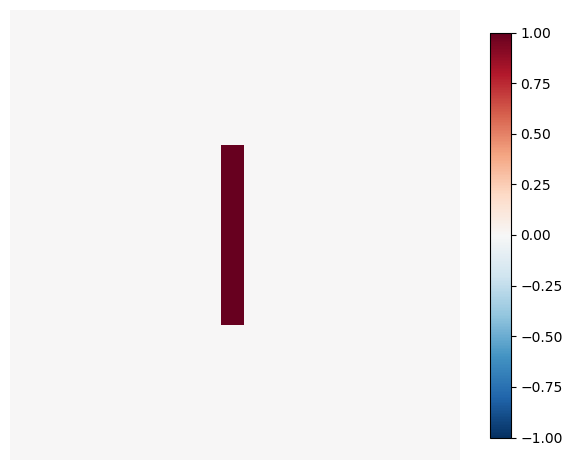

In [85]:
Utils.plot_rb(img, "input_img", true, -1,1, true)

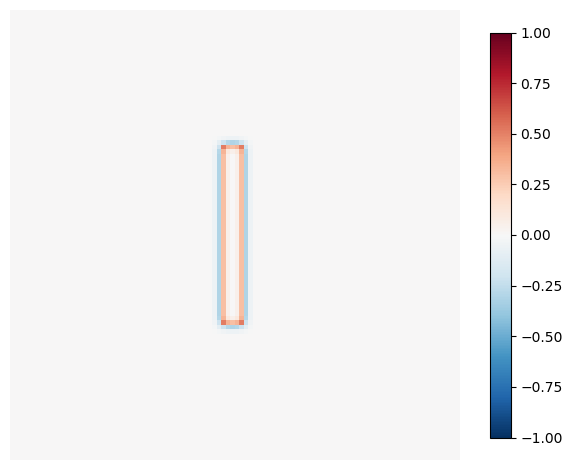

In [86]:
Utils.plot_rb(u_p, "u_p", true, -1,1, true)

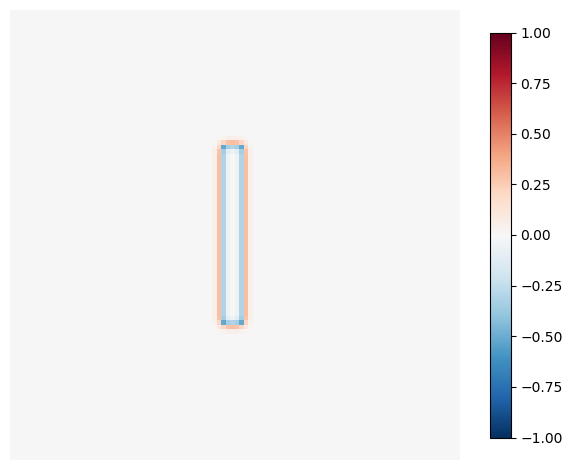

In [87]:
Utils.plot_rb(u_m, "u_m",  true, -1,1, true)

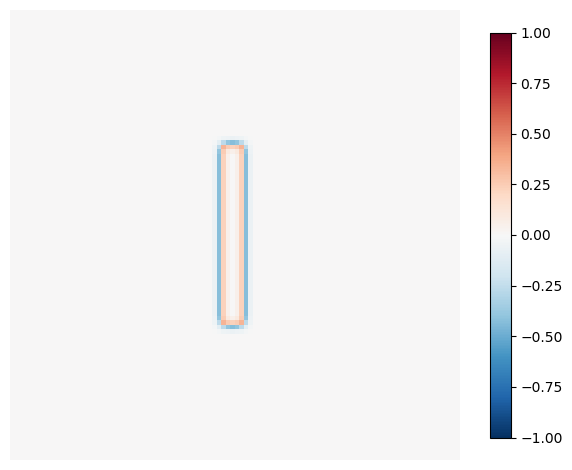

In [88]:
Utils.plot_rb(v_p, "v_p", true, -1,1, true)

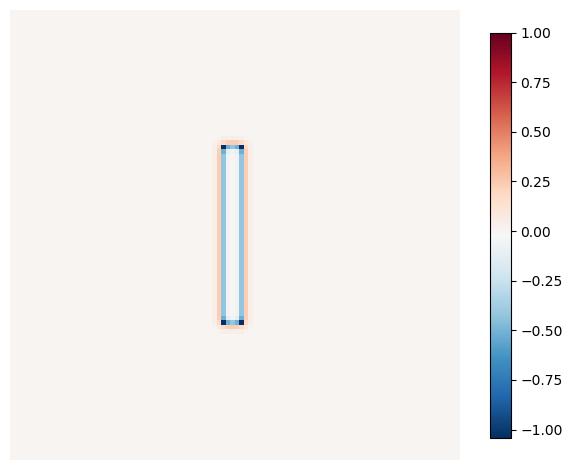

In [89]:
Utils.plot_rb(v_m,  "v_m", true,  -1.04,1, true)

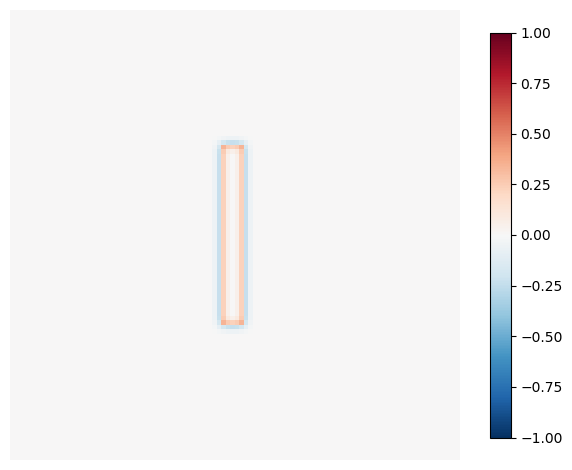

In [90]:
Utils.plot_rb(v, "v", true, -1,1, true)

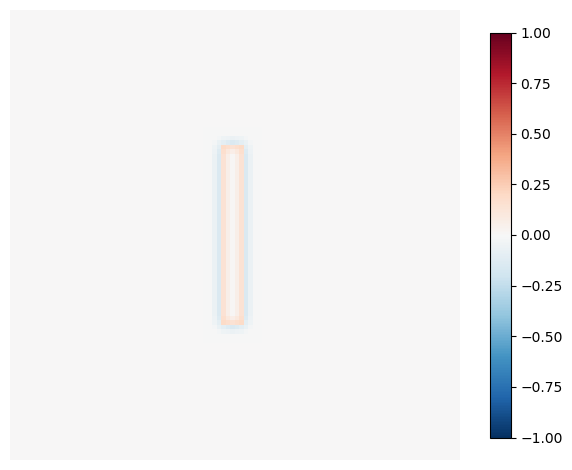

In [91]:
Utils.plot_rb(V, "V",  true, -1,1, true)

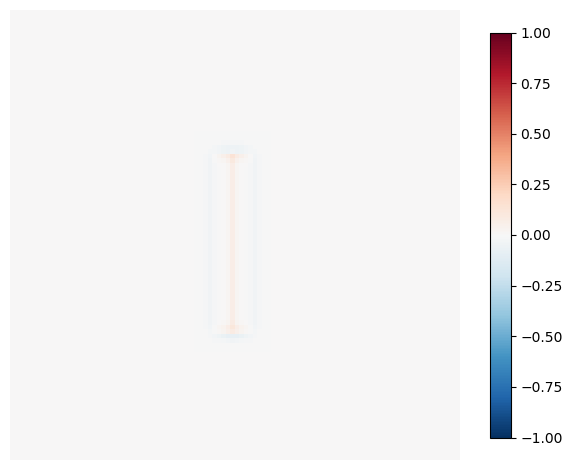

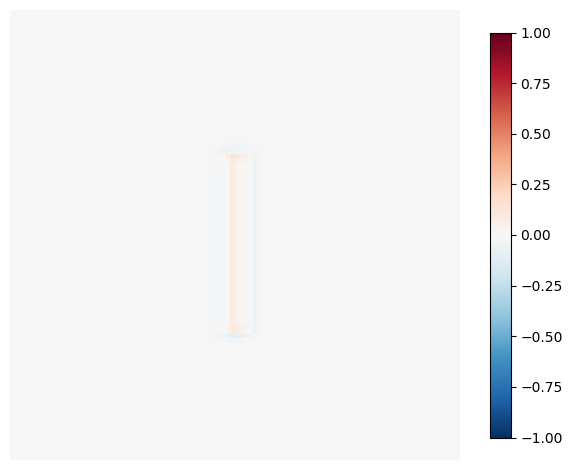

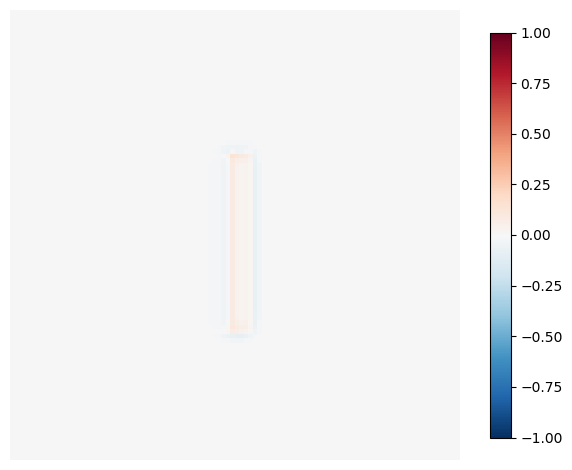

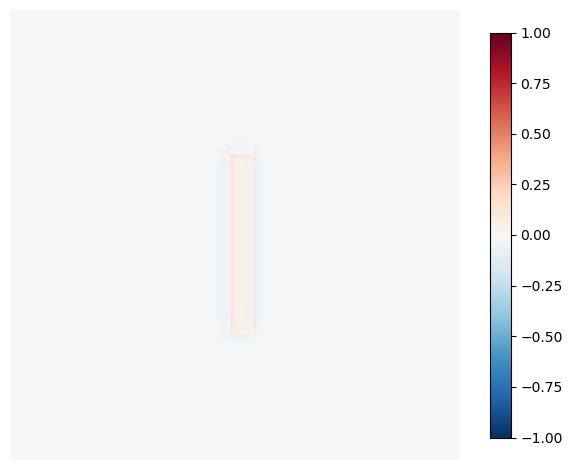

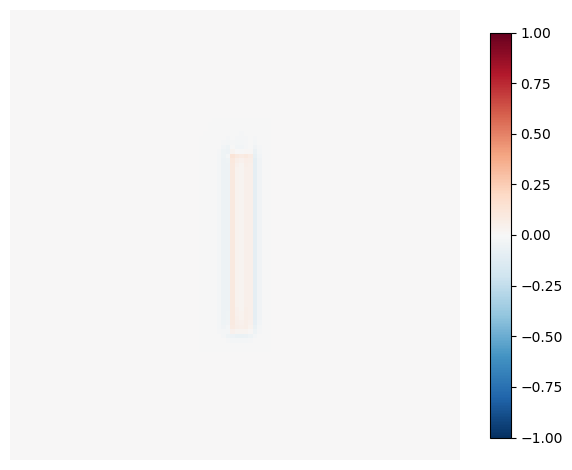

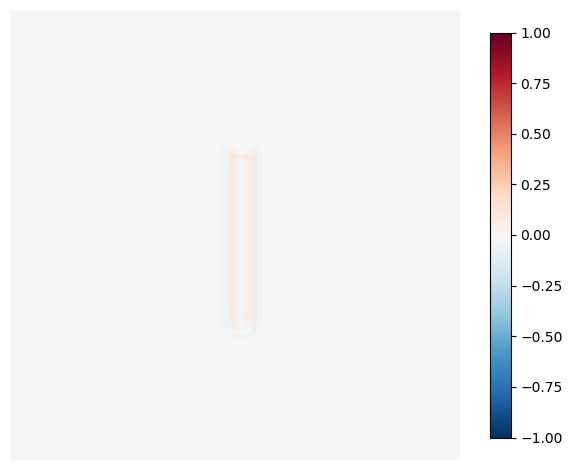

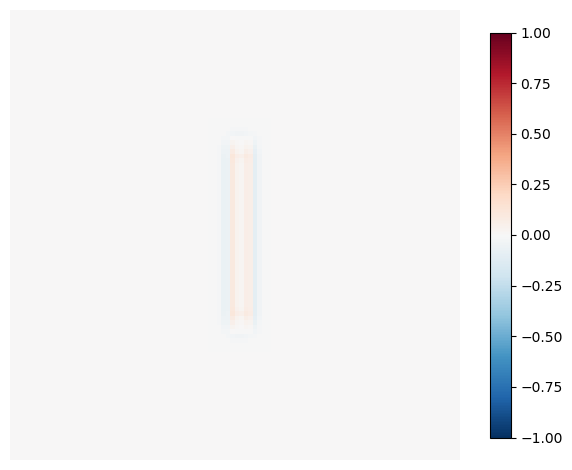

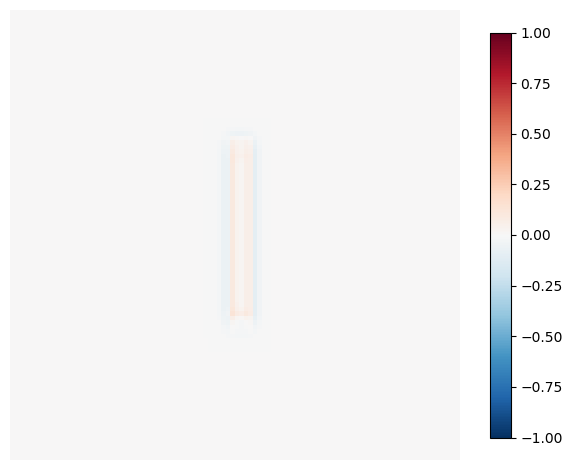

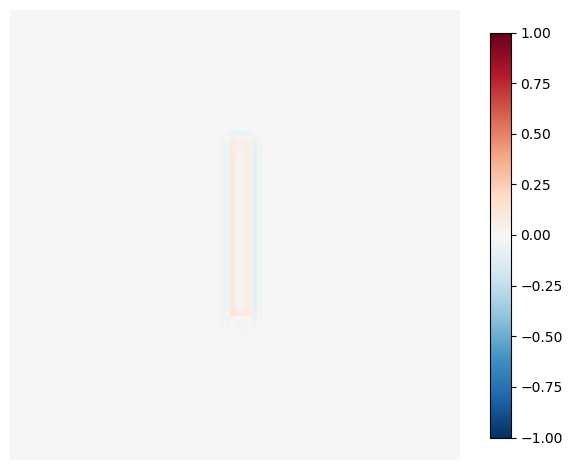

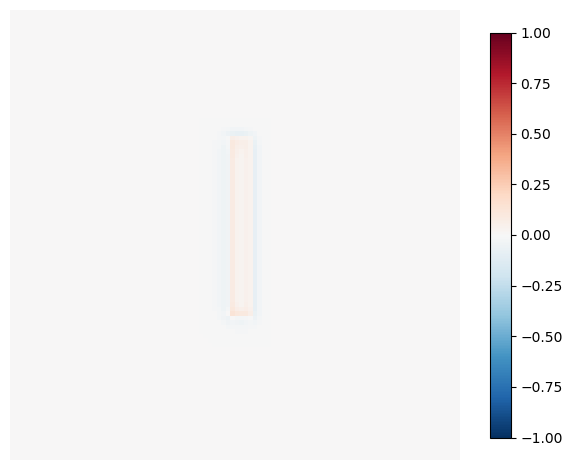

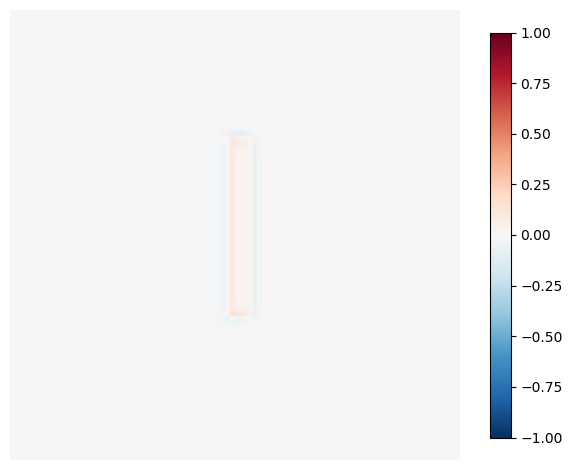

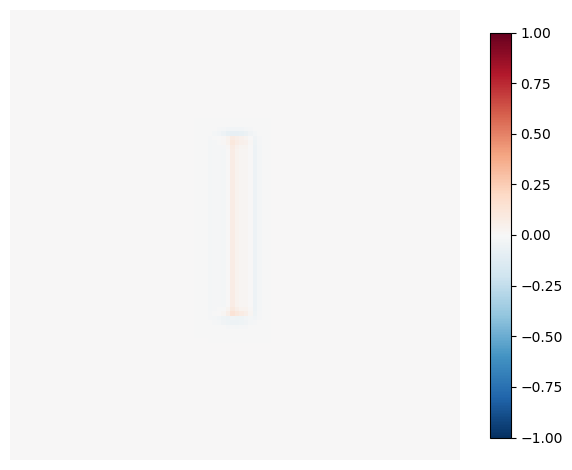

In [92]:
Utils.save_orientations_rb(R, "R",  -1,1, true)

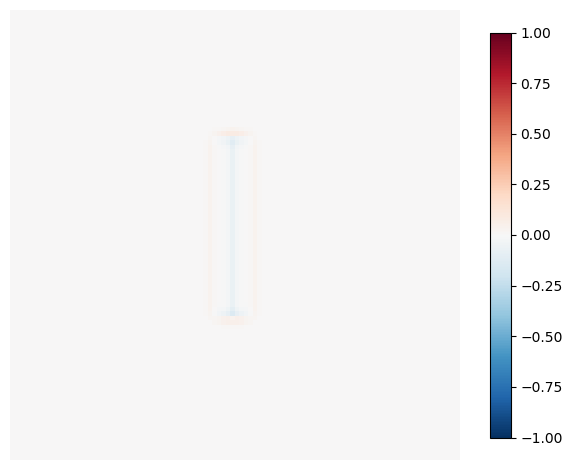

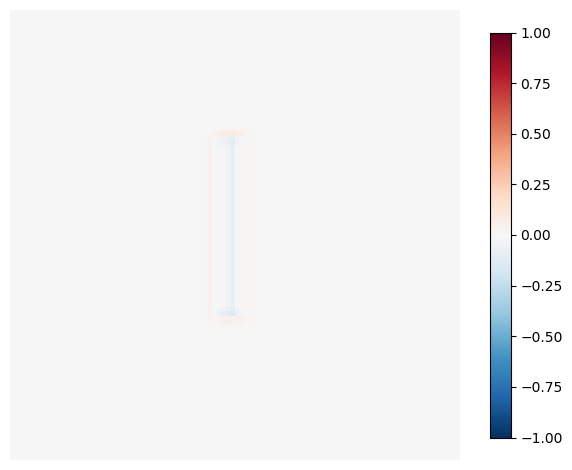

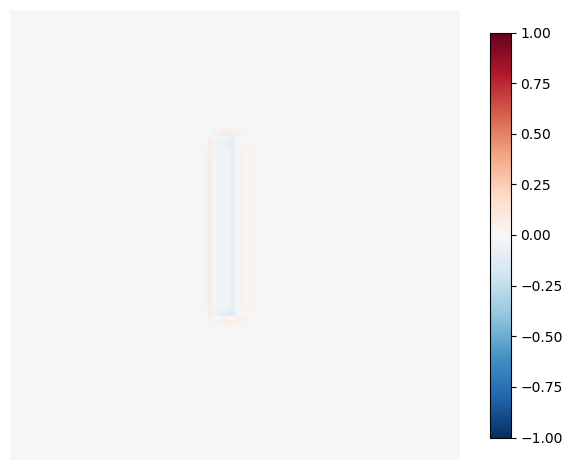

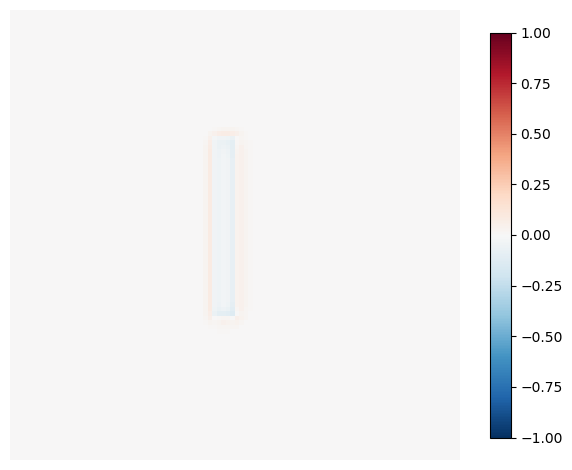

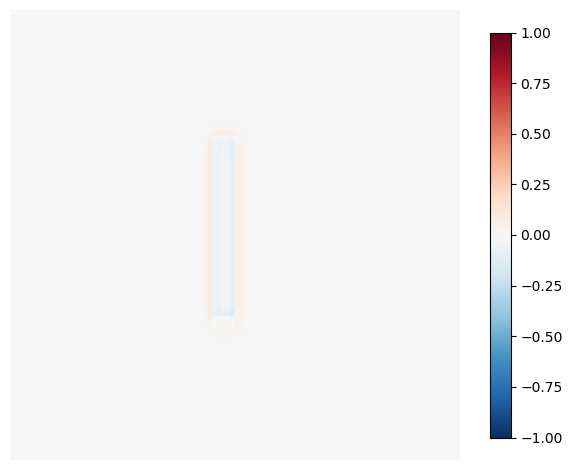

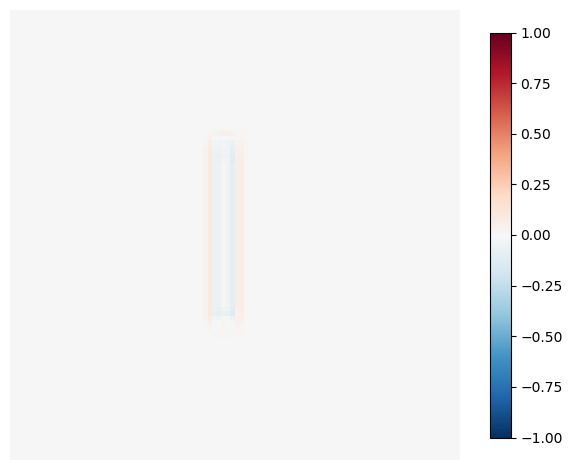

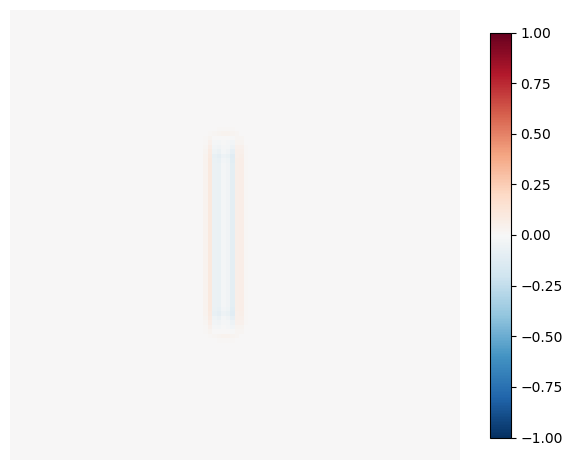

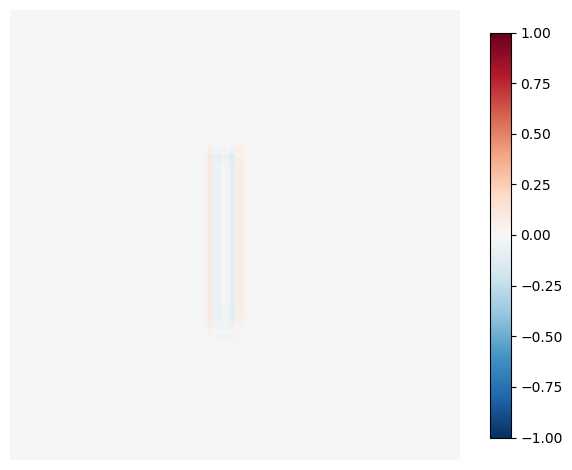

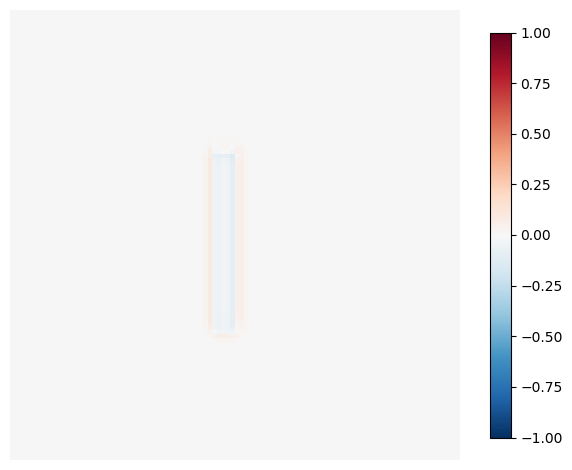

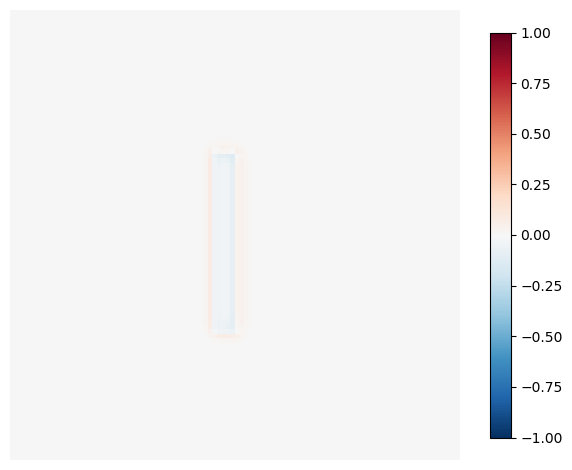

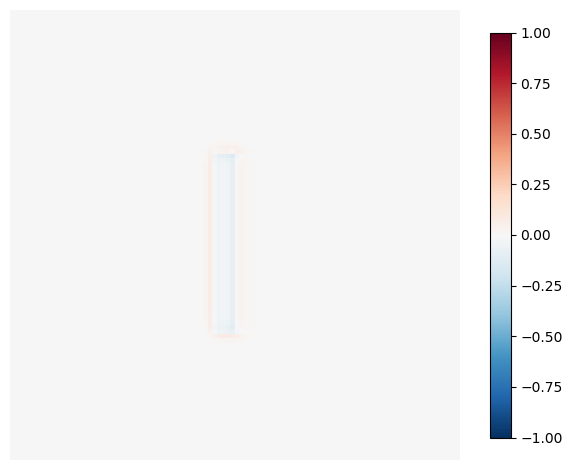

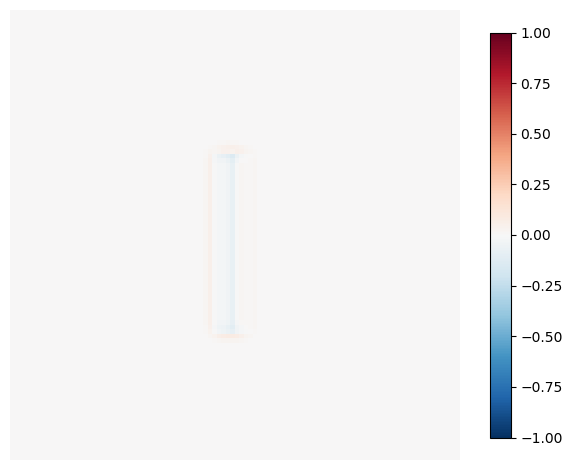

In [93]:

Utils.save_orientations_rb(L, "L", -1,1, true)


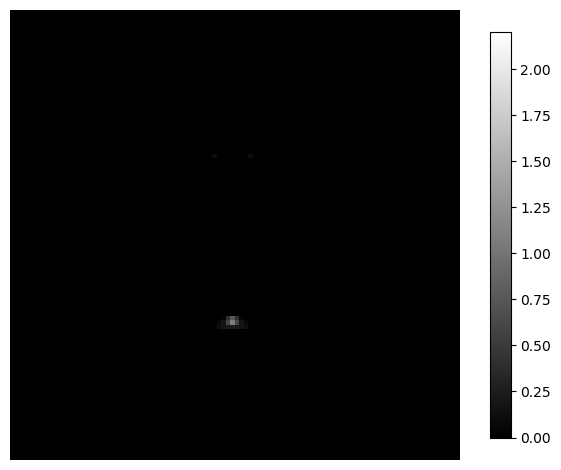

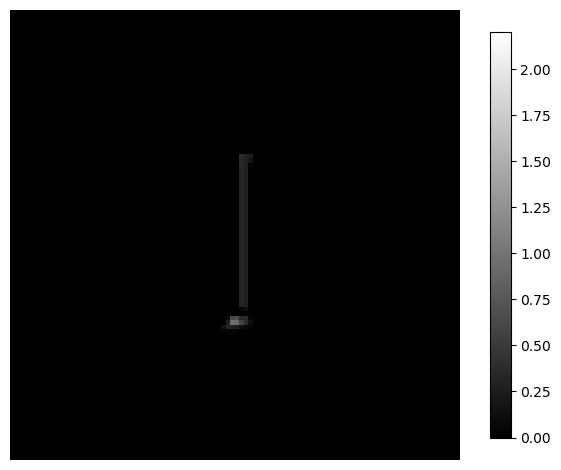

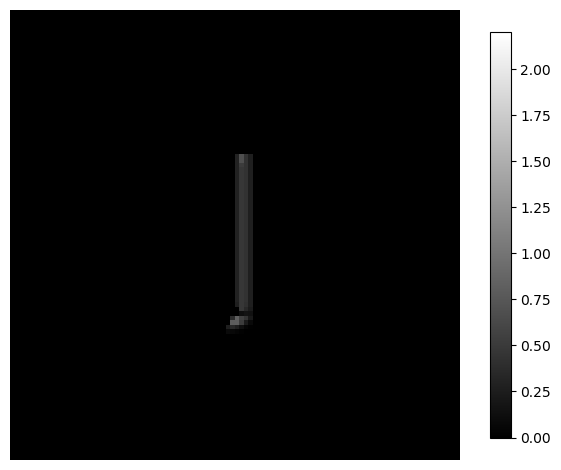

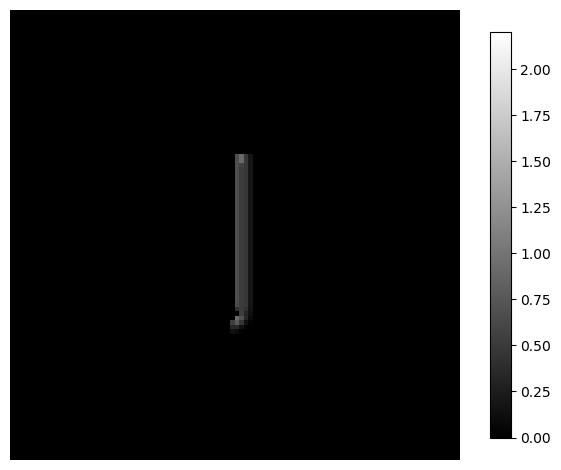

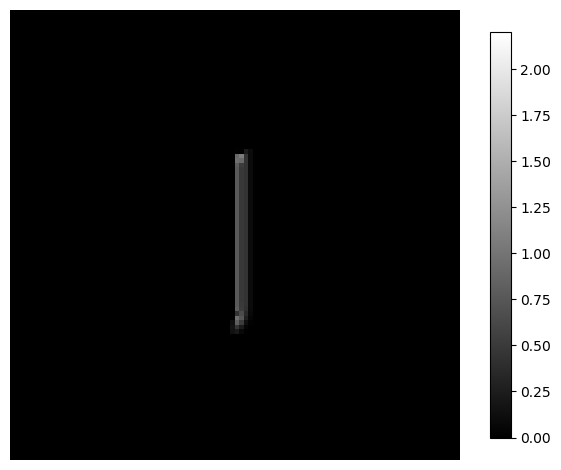

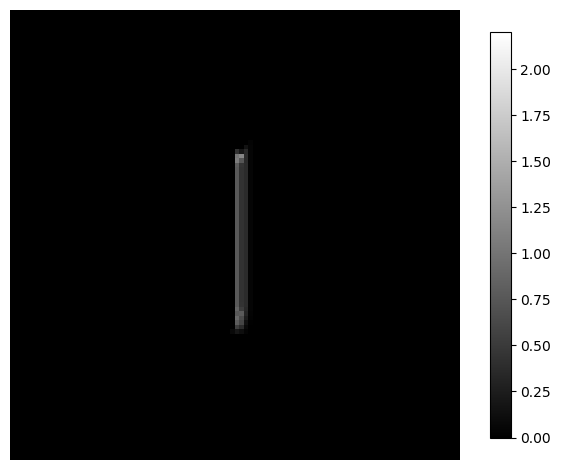

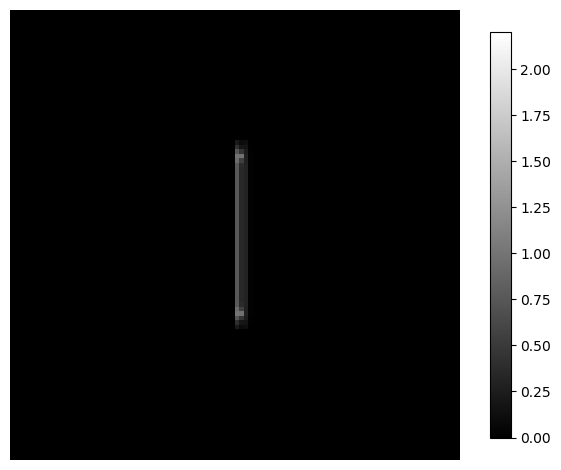

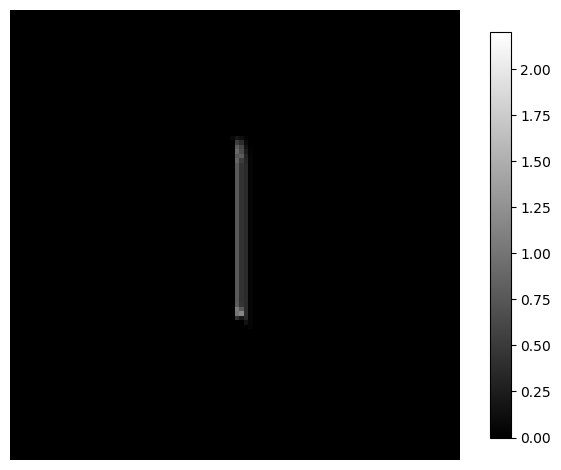

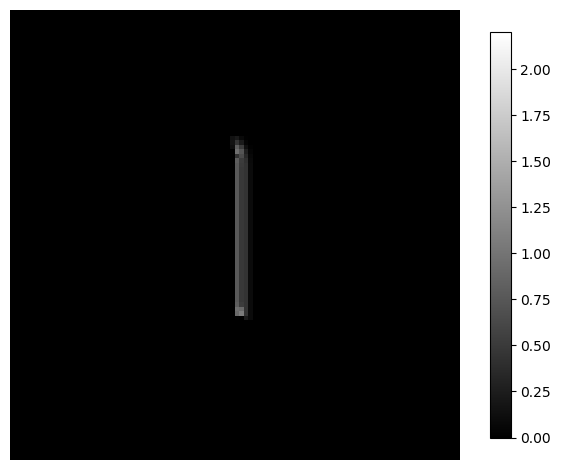

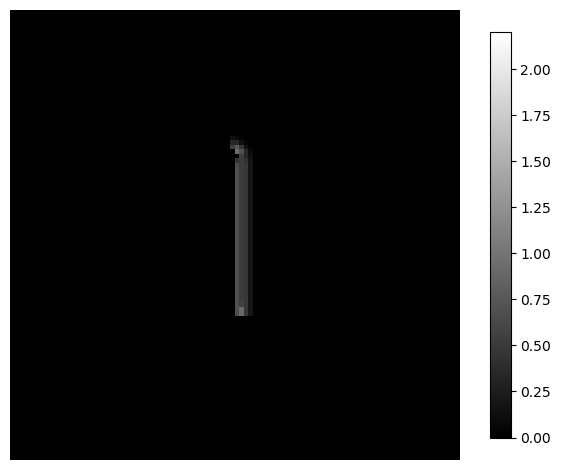

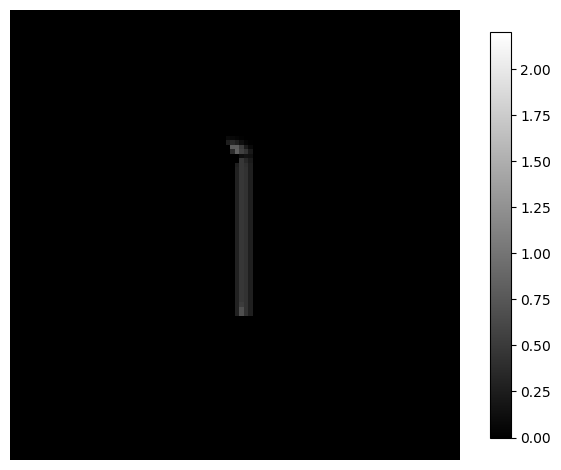

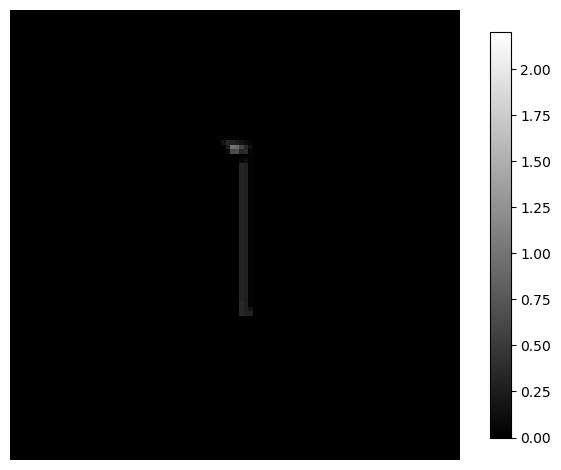

In [94]:

Utils.save_orientations_gs(S, "S",0,2.2,true)

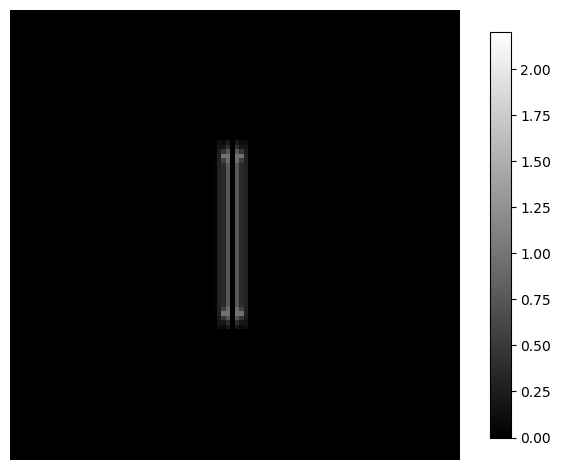

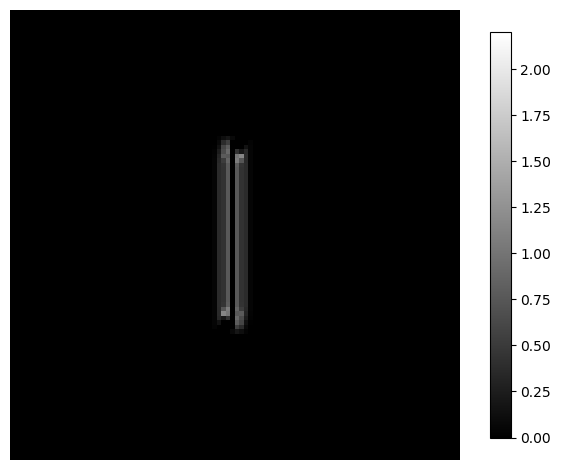

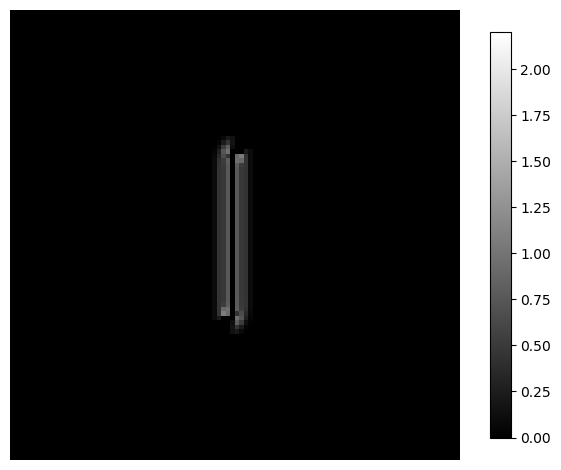

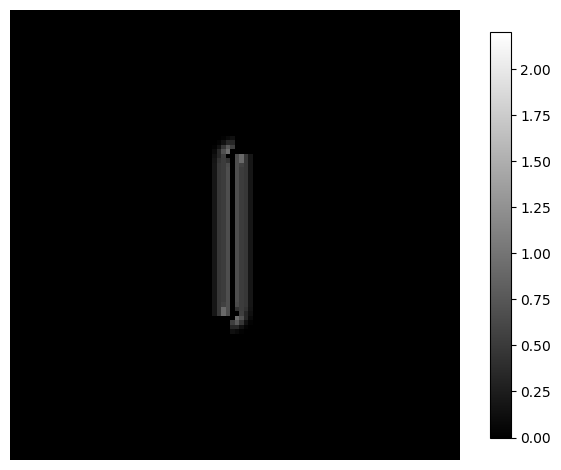

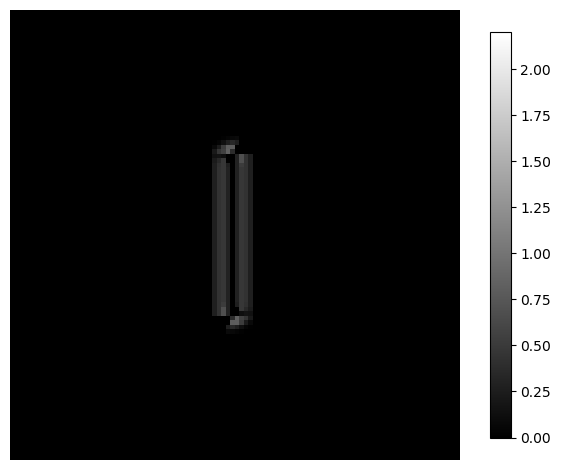

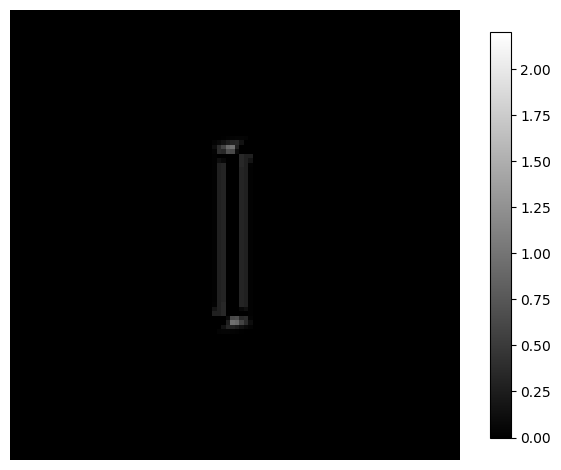

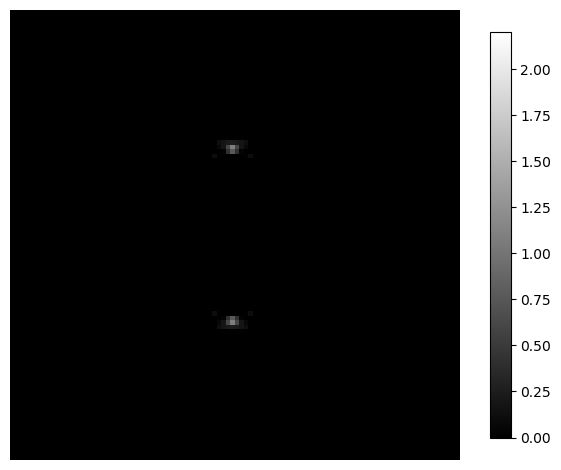

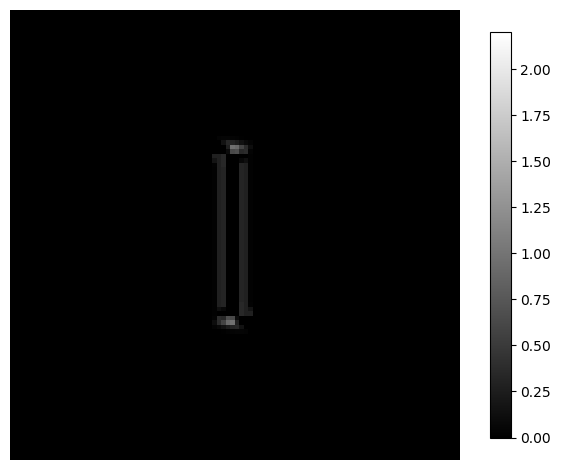

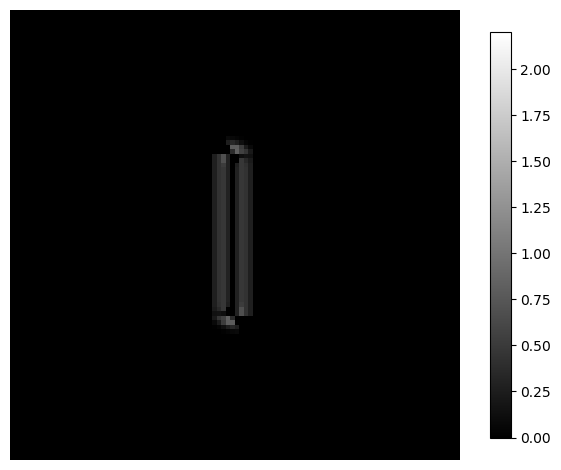

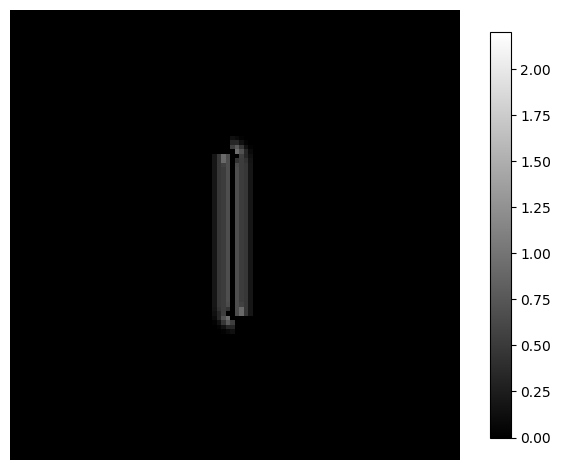

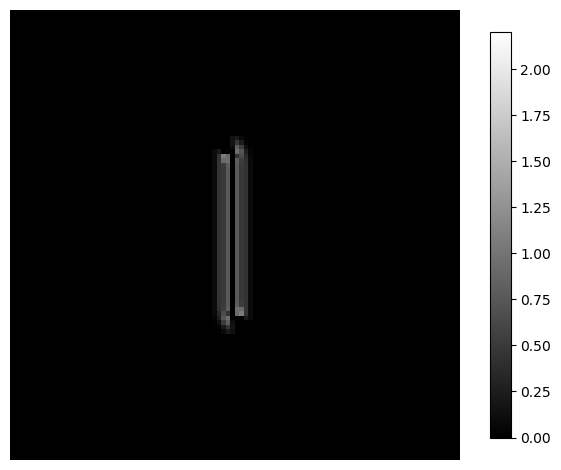

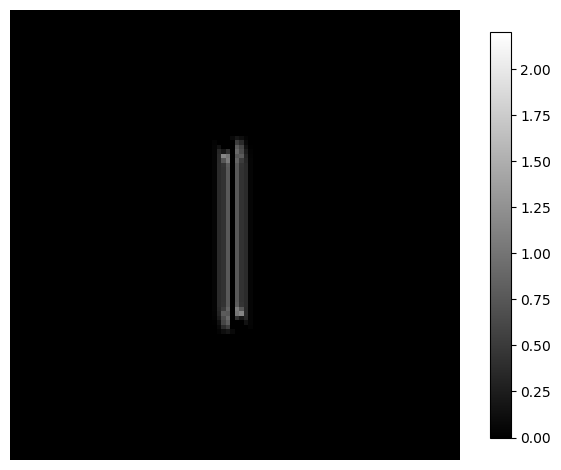

In [95]:
Utils.save_orientations_gs(C, "C", 0,2.2, true)

In [107]:
R_ = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2],2*K),size(V)[1],size(V)[2],2*K)
L_ = copy(R_)

for k in 1:2*K
    θ = π*(k-1)/K
    R_[:,:,k] = imfilter(V, relu.(LamKernels.kern_d(σ_2, θ)), "circular")
    L_[:,:,k] = -imfilter(V, relu.(-LamKernels.kern_d(σ_2, θ)), "circular")
end

S_a_ = R_ .+ L_
S_b_ = -abs.(R_ .- L_)
S_ = γ .* relu.((S_a_ .+ S_b_));

In [108]:
C_ = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2],K),size(V)[1],size(V)[2],K)

for k in 1:K
    C_[:,:,k] = S_[:,:,k] .+ S_[:,:,k+K]  
end

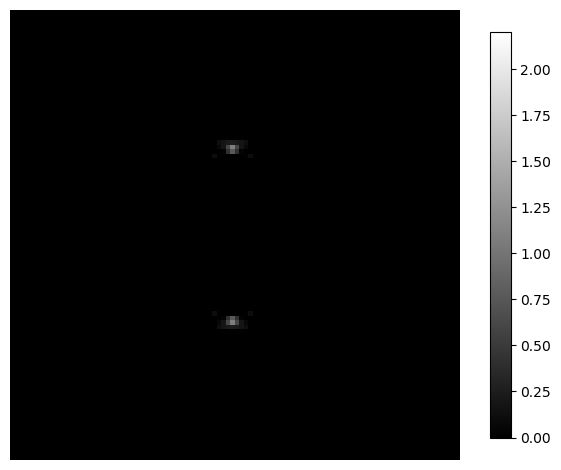

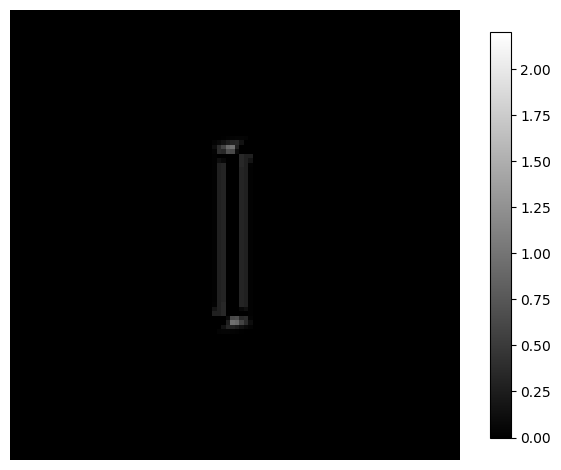

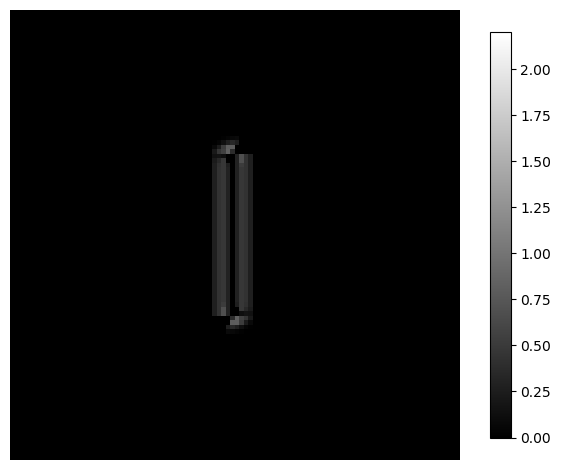

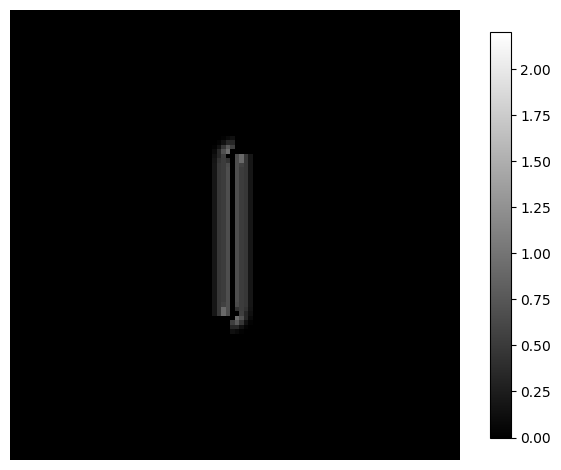

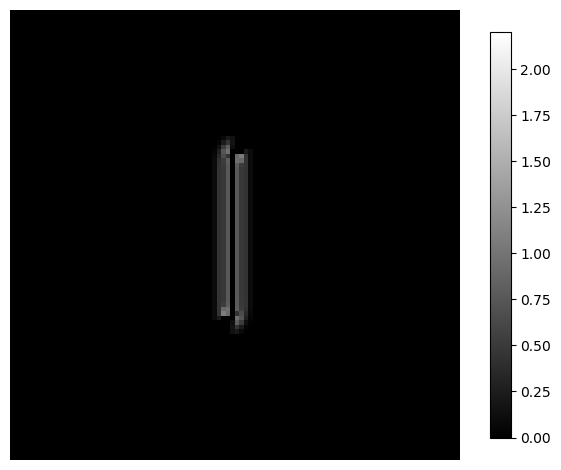

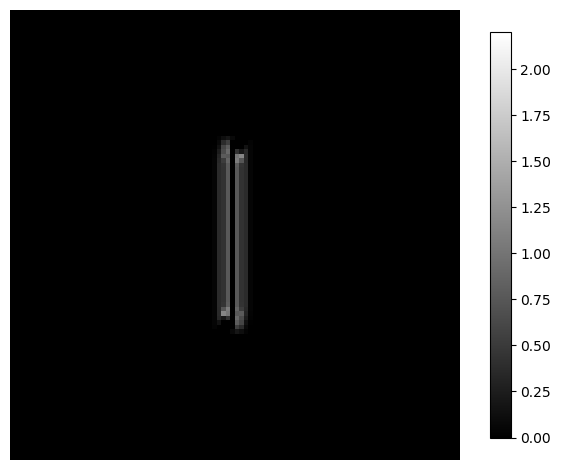

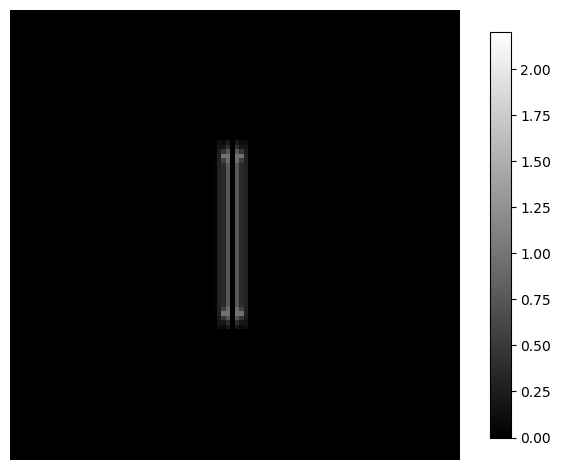

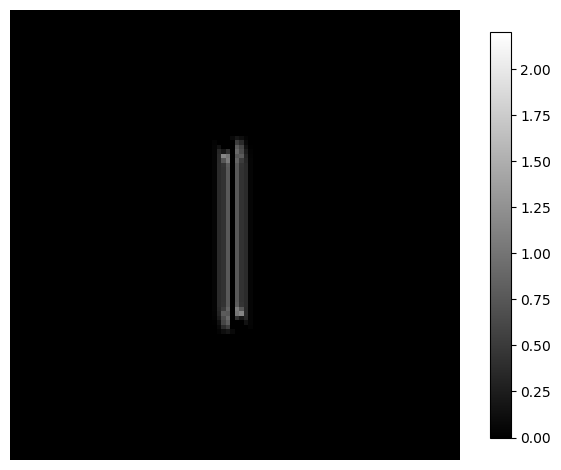

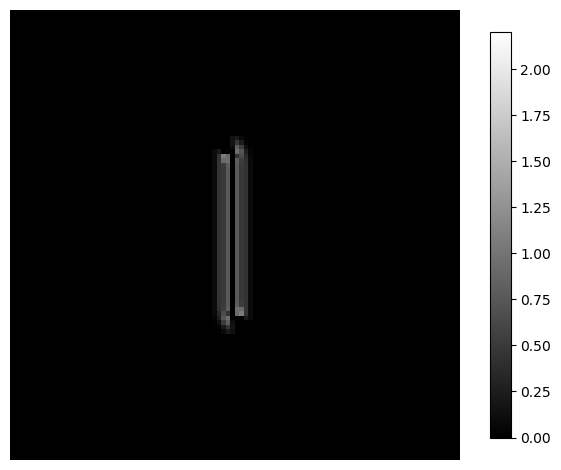

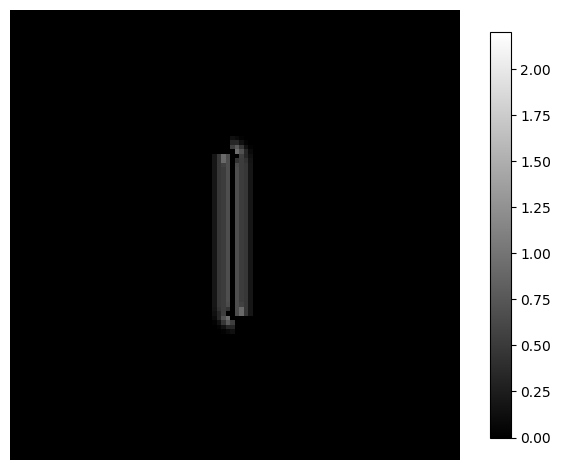

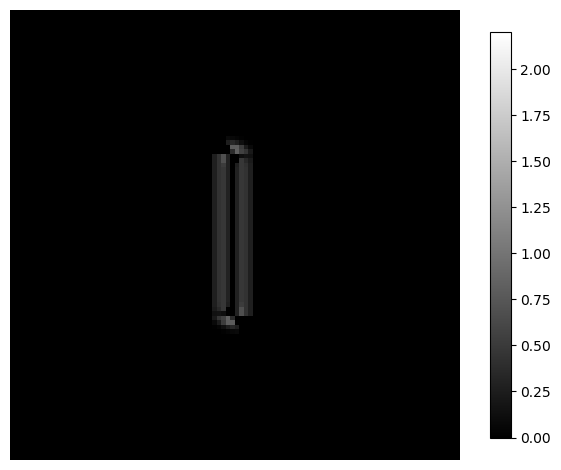

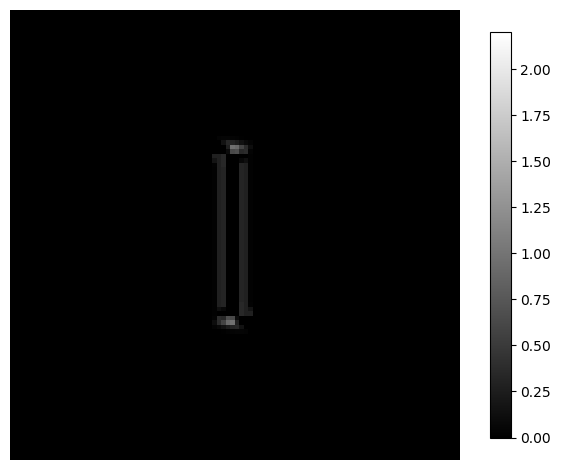

In [109]:
Utils.save_orientations_gs(C_, "C_", 0, 2.2, true)

In [103]:
findmax(abs.(C-C_))

(1.0911808453369582, CartesianIndex(70, 50, 1))